# CREDIT SCORE

## INFORMASI DATA

Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).
****

## TUJUAN PEMODELAN
Memprediksi **apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei** berdasarkan data pada bulan Februari-April 2015 pada data testing.
****


### Import data Train & Testing

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('D:/Python/Machine Learning/2. Credit Scoring/training.csv')
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [3]:
test = pd.read_csv('D:/Python/Machine Learning/2. Credit Scoring/testing.csv', sep = ';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


***

### Data Info
Berdasarkan info maka dapat diketahui karakteristik data yang akan dianalisis.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [5]:
train.shape

(16625, 16)

In [6]:
test.shape

(16625, 15)

Berdasarkan data info maka dapat diketahui bahwa data yang akan dianalisis terdiri dari 23 variabel yang terdiri dari variabel numerik dan juga kategorik. Data yang di peroleh terdiri dari 16.625 data. Dan harapannya, berdasarkan variabel-variabel tersebut dapat memprediksi pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei. Namun dikarenakan terdapat data unik yang tidak dapat dianalisis lebih lanjut yaitu variabel ID, maka data tersebut dapat dihilangkan.

In [7]:
train = train.drop(['ID'],axis=1)
test = test.drop(['ID'],axis=1)

Setelah dilakukan penghapusan variabel data yang tidak dapat digunakan, maka dapat dilakukan proses analisis selanjutnya.
***

### Missing Value Detection
Pada informasi data tidak diketahui apakah dari 16.625 data memiliki indikasi adanya *missing value*, maka dari itu perlu dilakukan pengecekan. 

In [8]:
#count how many missing values per field
df_null = train.isnull().sum().sort_values(ascending = False)
df_null

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
dtype: int64

Berdasarkan pengecekan *missing value* maka dapat diketahui bahwa tidak terdapat data yang *missing* sehingga dapat dikatakan keseluruhan data dapat digunakan.
***

### Data Understanding

In [9]:
# Import the Package for Make the Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

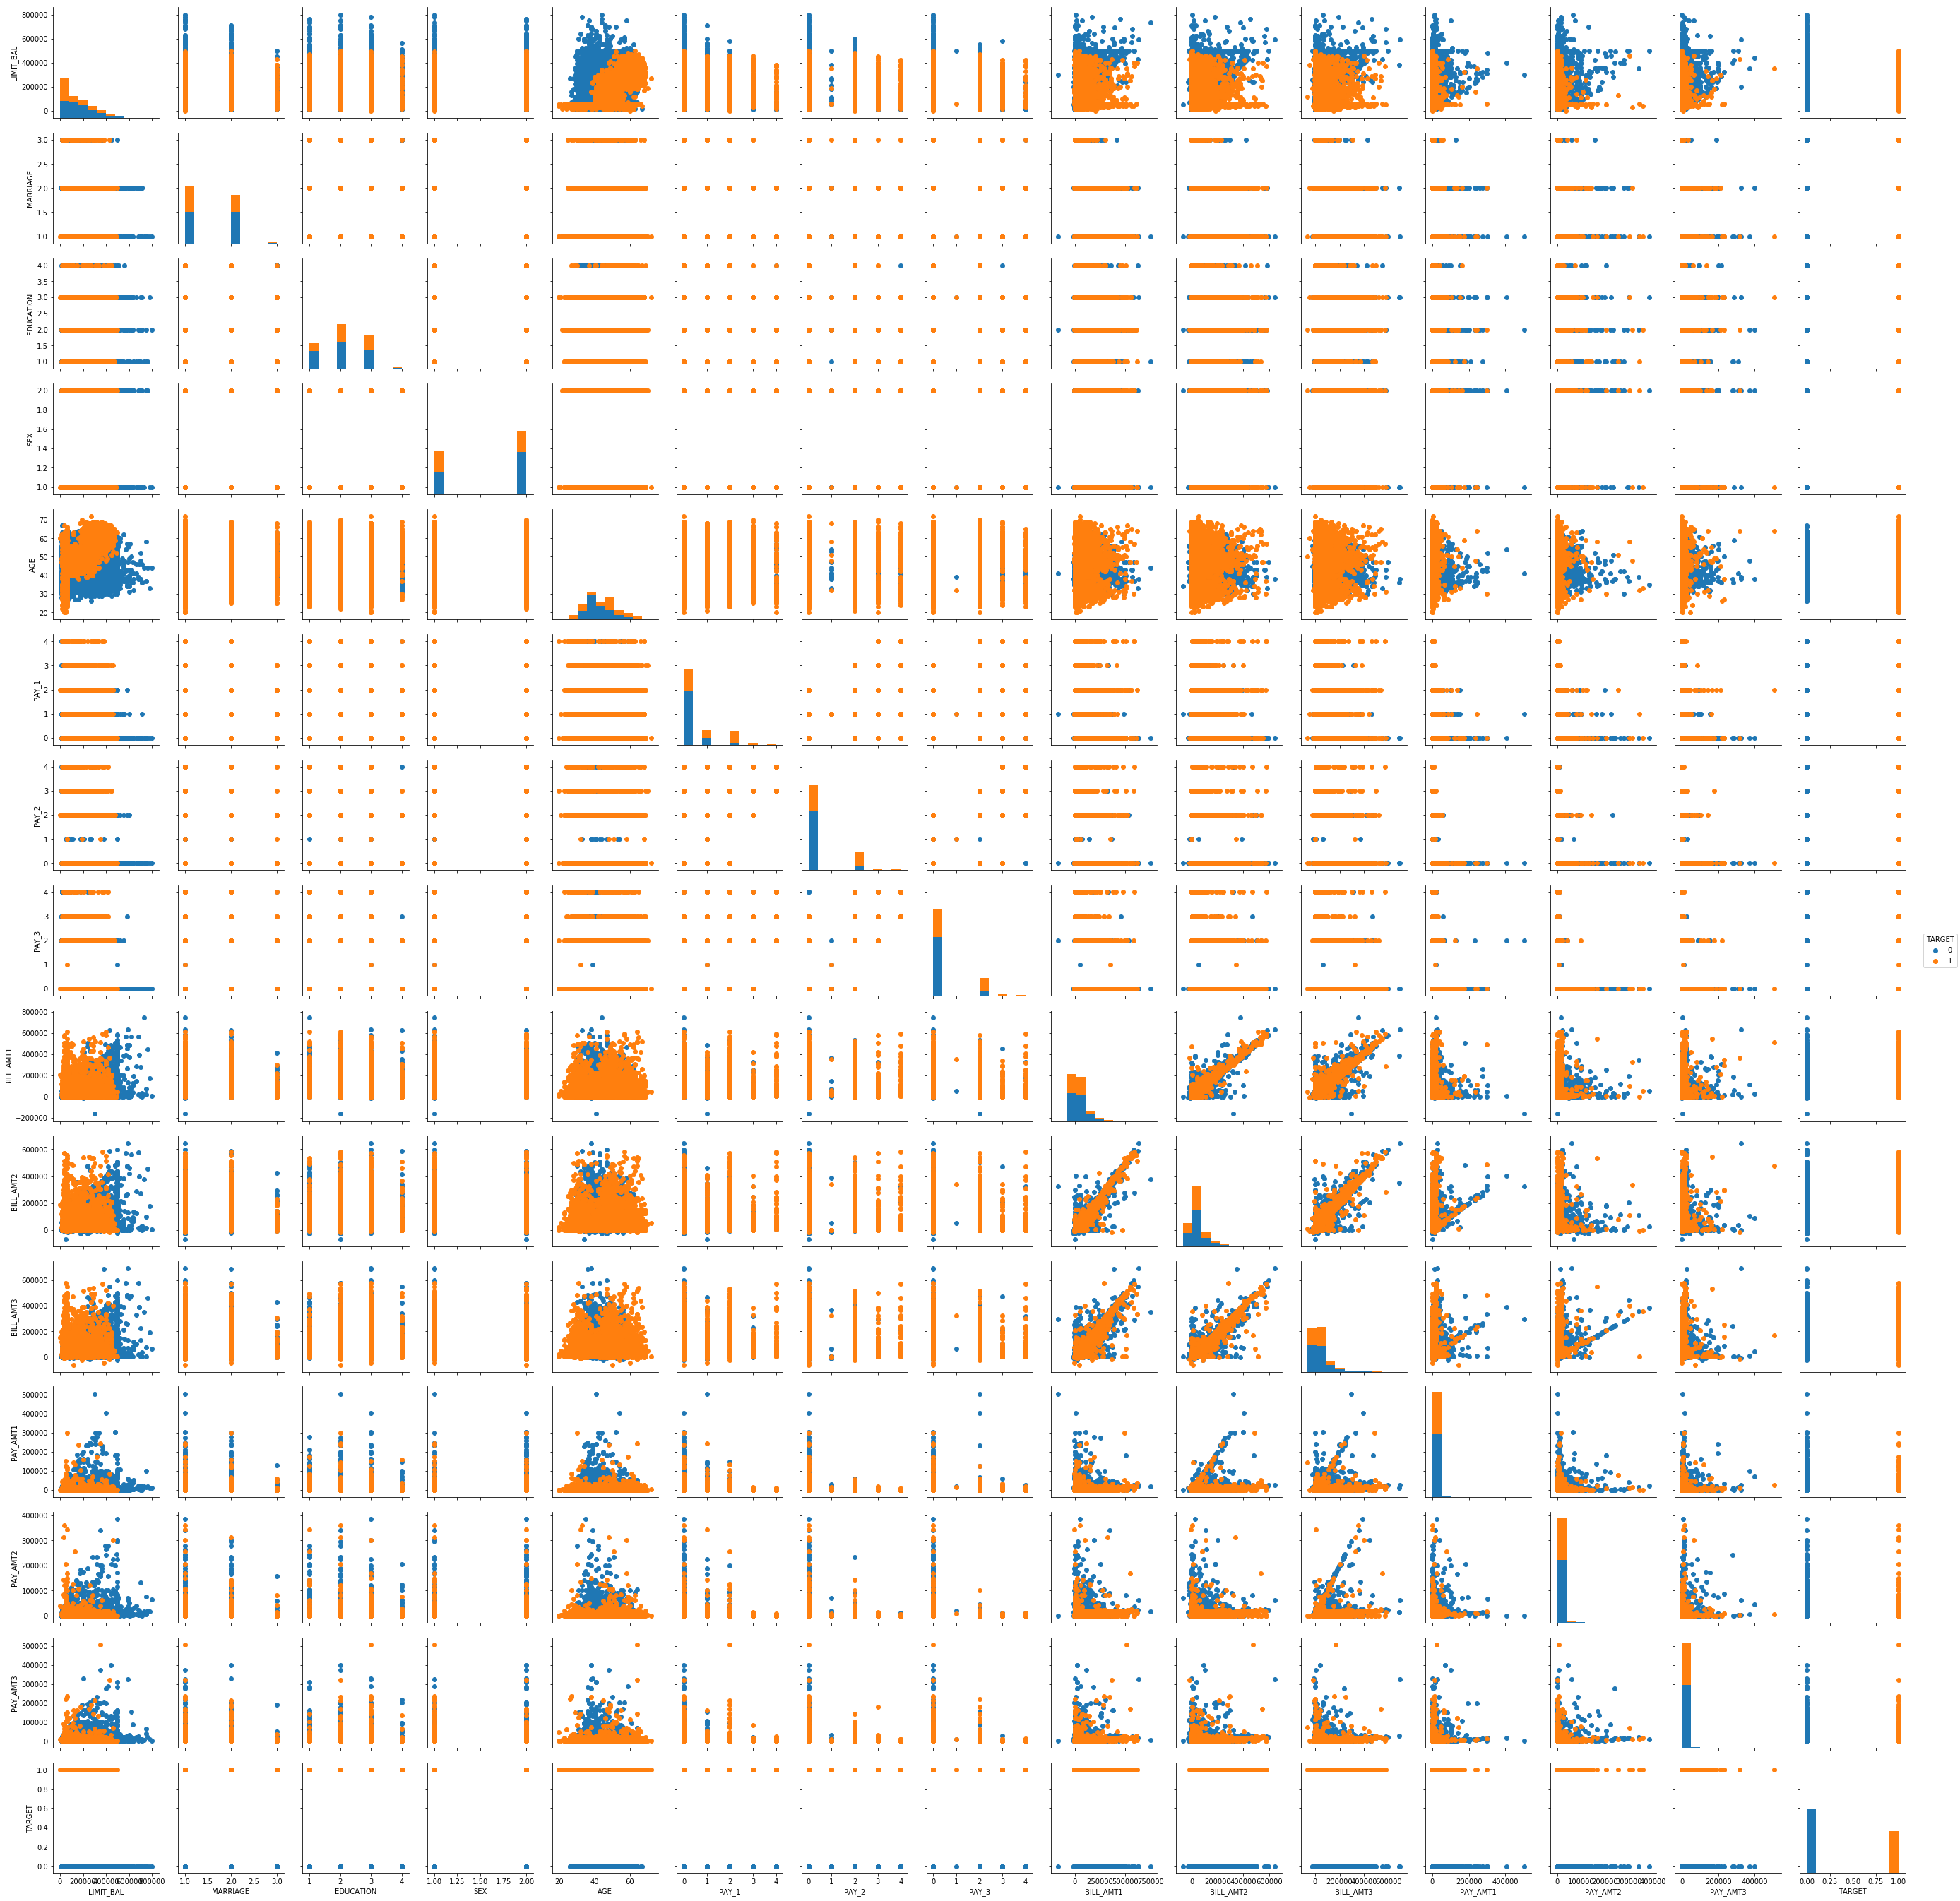

In [10]:
g = sns.PairGrid(train, hue="TARGET")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

UNtuk mengetahui pola data secara keseluruhan, maka dapat dilakukan visualisasi secara bersamaan berdasasrkan variabel TARGET. Untuk mengetahui korelasi antar variabel, maka dapat dilakukan dengan menggunakan visualisasi **Correlation Plot** sebagai berikut.

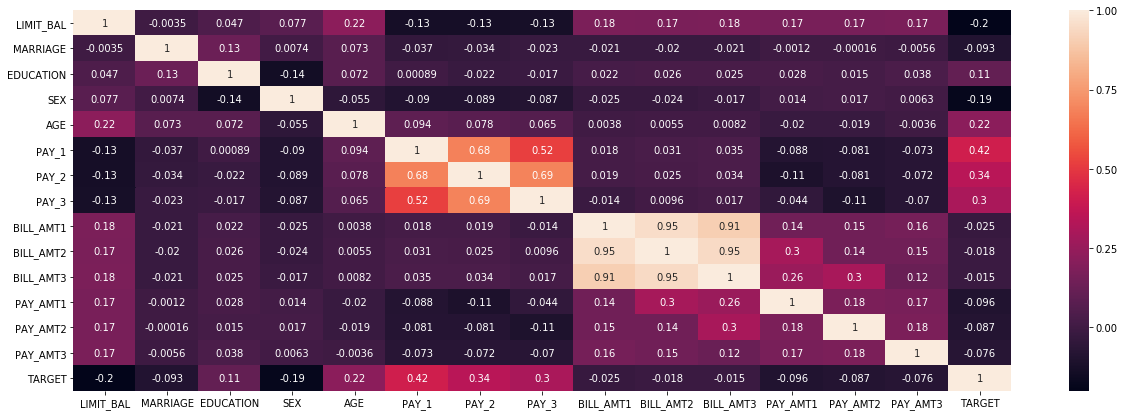

In [11]:
plt.figure(figsize=(21,7))
sns.heatmap(train.corr(),annot=True)
plt.show()

Untuk mengetahui pola variabel kategorik jika dilihat berdasarkan variabel TARGET, maka dapat dilakukan visualisasi **Bar Plot** sebagai berikut.

In [12]:
train['TARGET'] = train.TARGET.astype(str)

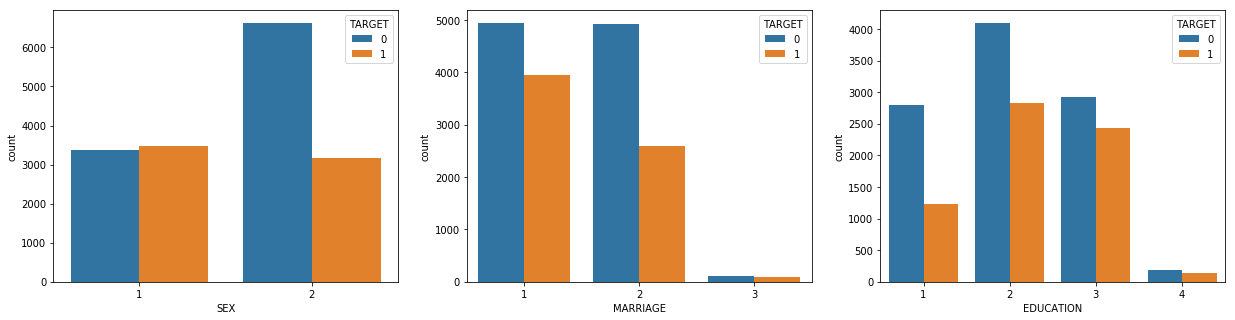

In [13]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.countplot(data = train, x = 'SEX', hue='TARGET')
f.add_subplot(1,3,2)
sns.countplot(data = train, x = 'MARRIAGE', hue='TARGET')
f.add_subplot(1,3,3)
sns.countplot(data = train, x = 'EDUCATION', hue='TARGET')
plt.show()

Berdasarkan Bar Plot, maka dapat diketahui bahwa setiap variabel kategorik di tampilkan berdasarkan variabel targetnya (0) Tidak Terlambat dan (1) Terlambat. Sera dapat diketahui bahwa :
- Pria (1) relatif sama bagi kredit yang terlambat dan tidak terlambat bayar. Wanita (2) relatif tidak terlambat.
- Belum Menikah (1) reatif tidak terlambat, Menikah (2) reatif tidak terlambat, Lainnya (3) relatif sama.
- Mayoritas pelanggan memiliki tingkat pendidikan Dipl/S1 (2). Dan di kelompok tersebut, mayoritas pelanggan tidak terlambat dalam membayarkan kreditnya. Hal tersebut juga terjadi pada kelompok pendidikan lainnya, yaitu S2/S3 (1), SMA (3), dan Lainnya (4)

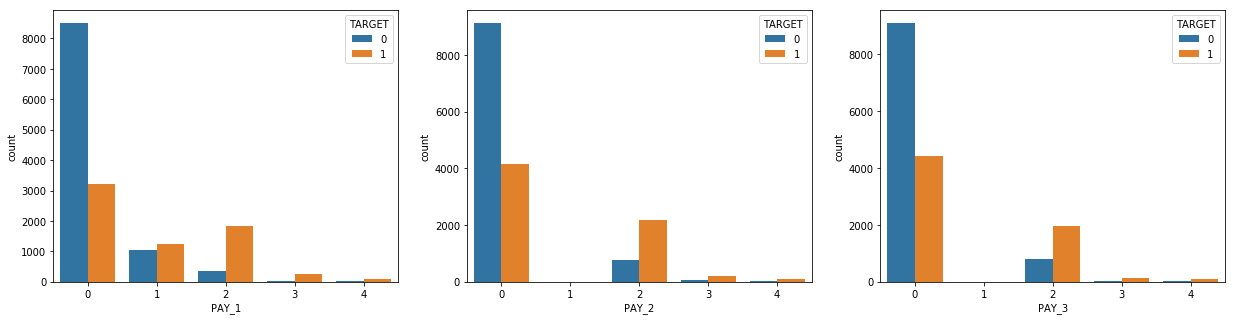

In [14]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.countplot(data = train, x = 'PAY_1', hue='TARGET')
f.add_subplot(1,3,2)
sns.countplot(data = train, x = 'PAY_2', hue='TARGET')
f.add_subplot(1,3,3)
sns.countplot(data = train, x = 'PAY_3', hue='TARGET')
plt.show()

Jika dilihat berdasarkan **Bar Plot** pada bulan 1 s.d 3 yang dikelompokkan berdasarkan TARGET menunjukkan pola yang relatif sama. Dari kelompok PAY 1 s.d 4 pada variabe PAY 1, PAY 2, PAY 3 menunjukkan pelanggan yang terlambat lebih tinggi jika dibandingkan dengan yang tepat waktu. **Stacked Barplot** juga dapat dilakukan guna mengetahui persentase TARGET pada setiap kelompok di setiap variabel kategorik,

Visualisasi selanjutnya dapat menggunakan **Box Plot**. Box Plot dapat digunakan sebagai visualisasi data guna mengetahui apakah data memiliki indikasi adanya outlier ataupun tidak. 

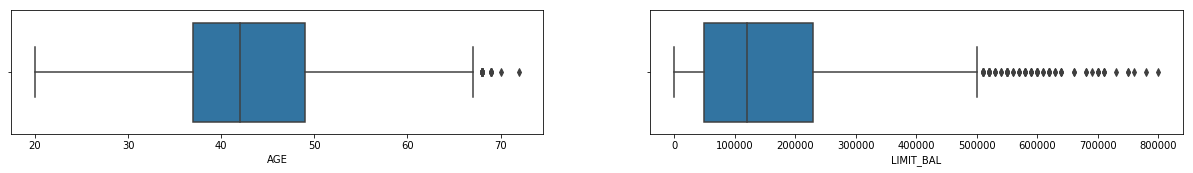

In [15]:
f=plt.figure(figsize=(21,5))
f.add_subplot(2,2,1)
sns.boxplot(data = train, x = 'AGE')
f.add_subplot(2,2,2)
sns.boxplot(data = train, x = 'LIMIT_BAL')
plt.show()

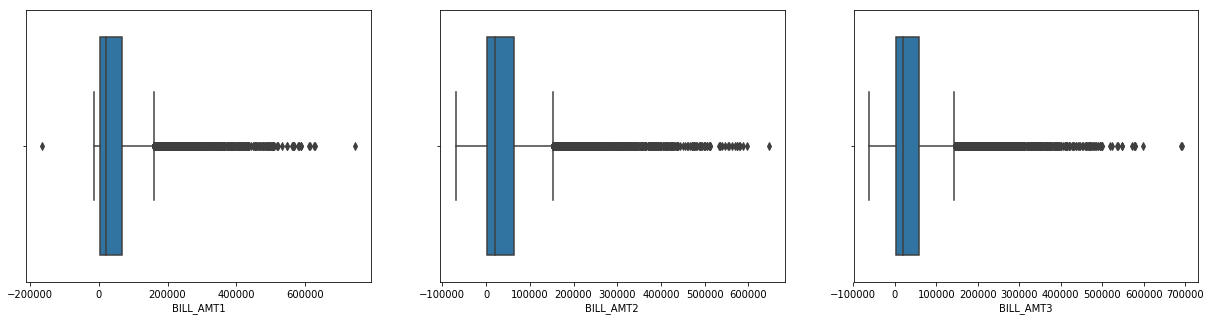

In [16]:
BILL = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3']
categorical = train.drop(BILL, axis=1)
numerical = train[BILL]
f = plt.figure(figsize=(21,5))
axes = 130
for num in numerical :
    axes += 1
    f.add_subplot(axes)
    sns.boxplot(data = numerical, x = num)
plt.show()

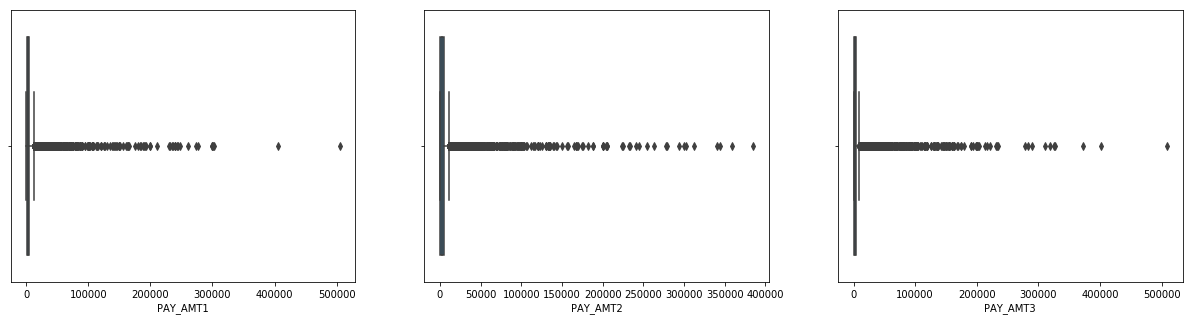

In [17]:
PAY = ['PAY_AMT1', 'PAY_AMT2','PAY_AMT3']
categorical = train.drop(PAY, axis=1)
numerical = train[PAY]
f = plt.figure(figsize=(21,5))
axes = 130
for num in numerical :
    axes += 1
    f.add_subplot(axes)
    sns.boxplot(data = numerical, x = num)
plt.show()

Jika terdapat banyak titik di luar *Box Plot* maka dapat diketahui terdapat banyak data yang outlier. Untuk dapat menggunakan data yang memiliki outlier dapat diatasi dengan cara transformasi. Cara sederhana dalam melakukan transformasi yaitu dengan melakukan log() dan akar() pada setiap nilai yang memiliki outlier. Namun pada analisis kali ini, data outlier tetap digunakan tanpa melakukan transformasi data.

#### Variabel Age
Kategori umur menurut Departemen Kesehatan Republik Indonesia tahun 2009 yakni sebagai berikut :
- Masa remaja usia 12 – 25 tahun
- Masa dewasa usia 26 – 45 tahun
- Masa lansia usia 46 – 65 tahun
- Masa manula usia 65 – ke atas 
-

maka berdasarkan umur setiap pelanggan dikelompokkan berdasarkan empat kelompok yang terdiri dari kelompok usia Remaja, Dewasa, Lansia dan Manula

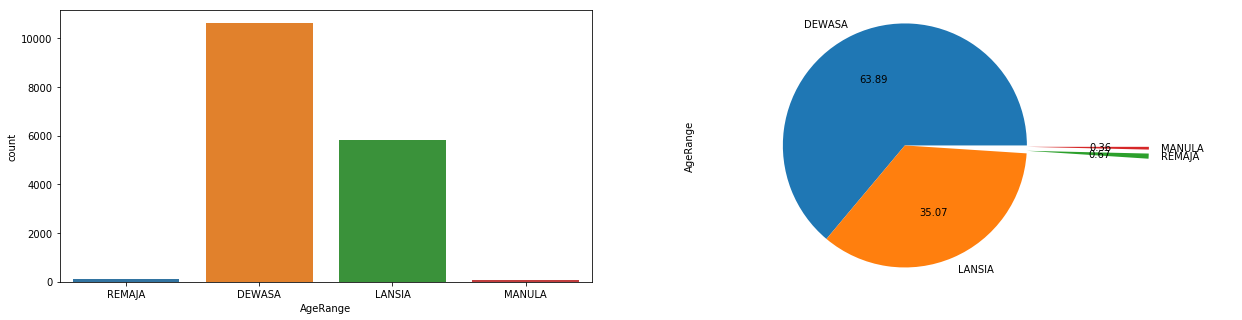

In [18]:
train1 = train
bins = [12, 26, 46, 66, np.inf]
names = ['REMAJA', 'DEWASA', 'LANSIA', 'MANULA']

train1['AgeRange'] = pd.cut(train1['AGE'], bins, labels=names)

f = plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
sns.countplot(train1['AgeRange'])
f.add_subplot(1,2,2)
explode = (0, 0, 1, 1)
train1['AgeRange'].value_counts().plot.pie(autopct = '%.2f', explode=explode)
plt.axis('equal')
plt.show()
plt.show()

# Modelling

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.metrics import classification_report

train = pd.read_csv('D:/Python/Machine Learning/2. Credit Scoring/training.csv')
test = pd.read_csv('D:/Python/Machine Learning/2. Credit Scoring/testing.csv', sep = ';')
train = train.drop(['ID'],axis=1)
test = test.drop(['ID'],axis=1)

In [20]:
x = train.drop(['TARGET'],axis=1)
y = train['TARGET']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

## Naive Bayes
Dikarenakan pada data under standing dapat diketahui bahwa terdapat beberapa data numerik, maka dengan menggunakan metode Naive Bayes perlu melakukan *grouping* atau *descretitation* pada setiap data numerik.

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.5846008421414454

> **Menyimpan Model (.pkl)**

In [24]:
from sklearn.externals import joblib
joblib.dump(nb, 'Model_NB.pkl')

['Model_NB.pkl']

In [25]:
Model_NB2 = joblib.load('Model_NB.pkl')
Model_NB2

GaussianNB(priors=None)

In [58]:
Model_NB2.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

****

In [27]:
ynb_predict = nb.predict(X_test)

In [28]:
ynb_proba = nb.predict_proba(X_test)

In [29]:
akurasi=accuracy_score(y_test, ynb_predict)
presisi=precision_score(y_test, ynb_predict)
recalls=recall_score(y_test, ynb_predict)
print(akurasi)
print(presisi)
print(recalls)

0.5733761026463512
0.48030263501174014
0.9312089023773394


In [30]:
print(classification_report(y_test, ynb_predict))

             precision    recall  f1-score   support

          0       0.88      0.34      0.49      3011
          1       0.48      0.93      0.63      1977

avg / total       0.72      0.57      0.55      4988



In [31]:
fpr, tpr, thresholds = roc_curve(y_test, ynb_predict)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.634817337273027


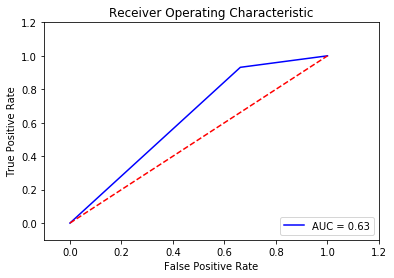

In [32]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest
Metode Random Forest  merupakan salah satu metode dalam Decision Tree.

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

yrf_predict=clf.predict(X_test)

> **Menyimpan Model (.pkl)**

In [34]:
from sklearn.externals import joblib
joblib.dump(clf, 'Model_RF.pkl')

['Model_RF.pkl']

In [35]:
Model_RF2 = joblib.load('Model_RF.pkl')
Model_RF2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
Model_RF2.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

***

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yrf_predict))

Accuracy: 0.8825180433039295


In [38]:
akurasi=accuracy_score(y_test, yrf_predict)
presisi=precision_score(y_test, yrf_predict)
recalls=recall_score(y_test, yrf_predict)
print(akurasi)
print(presisi)
print(recalls)

0.8825180433039295
0.8639455782312925
0.8351036924633283


In [39]:
print(classification_report(y_test, yrf_predict))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90      3011
          1       0.86      0.84      0.85      1977

avg / total       0.88      0.88      0.88      4988



In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, yrf_predict)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.8743768213229959


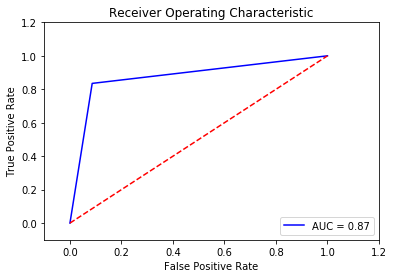

In [41]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

> **Menyimpan Model (.pkl)**

In [44]:
from sklearn.externals import joblib
joblib.dump(knn, 'Model_knn.pkl')

['Model_knn.pkl']

In [45]:
Model_knn2 = joblib.load('Model_knn.pkl')
Model_knn2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
Model_knn2.predict([])

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

***

In [47]:
knn.score(X_train, y_train)

0.8344934261407579

In [48]:
yk_pred = knn.predict(X_test)

In [49]:
akurasi=accuracy_score(y_test, yk_pred)
presisi=precision_score(y_test, yk_pred)
recalls=recall_score(y_test, yk_pred)
print(akurasi)
print(presisi)
print(recalls)

0.7626303127506014
0.7068335941575378
0.6853818917551846


In [50]:
print(classification_report(y_test, yk_pred))

             precision    recall  f1-score   support

          0       0.80      0.81      0.81      3011
          1       0.71      0.69      0.70      1977

avg / total       0.76      0.76      0.76      4988



In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, yk_pred)
auc = auc(fpr, tpr)
print('auc =', auc)

auc = 0.7493664689596248


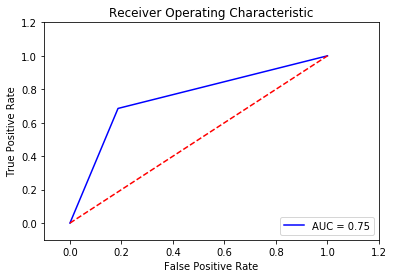

In [52]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Evaluation
Berdasarkan hasil analisis, maka dapat diketahui bahwa dengan menggunakan metode *Random Forest* menghasilkan pemodelan dengan nilai akurasi dan AUC tertinggi jika dibandingkan dengan metode *Naive Bayes* dan *kNN*. Sehingga dalam melakukan analisis Creditscoring dalam memprediksi *apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei* berdasarkan data pada bulan Februari-April 2015 pada data testing dapat menggunakan pemodelan *Random Forest* dengan memperhatikan karakteristik-karakteristik data.

In [53]:
X_test

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
11712,60000.0,1,2,2,28,0,0,0,296002.0,284025.0,278422.0,12000.0,11600.0,12628.0
7774,10000.0,2,1,1,46,0,0,0,5757.0,6706.0,7715.0,1200.0,1128.0,286.0
14436,130000.0,1,2,2,51,0,0,2,3223.0,3176.0,220.0,1220.0,0.0,632.0
8643,80000.0,2,2,2,54,0,0,0,67798.0,69206.0,70057.0,3100.0,2600.0,3000.0
5489,500000.0,1,3,1,39,0,0,0,26501.0,21340.0,11003.0,1261.0,5901.0,46.0
607,310000.0,1,1,2,33,0,0,0,2948.0,62593.0,152141.0,62635.0,100042.0,4017.0
12776,60000.0,1,2,1,52,2,0,0,38370.0,39448.0,58788.0,2000.0,20000.0,5000.0
15407,340000.0,1,3,1,47,1,2,2,14107.0,14779.0,14252.0,1200.0,0.0,2200.0
75,320000.0,1,1,2,34,0,0,0,247276.0,241167.0,238196.0,10000.0,10000.0,10000.0
1535,200000.0,2,1,2,38,0,0,0,0.0,0.0,69084.0,0.0,69084.0,3450.0
